In [1]:
# Install Tesseract OCR and Python wrapper
!apt-get install tesseract-ocr -y
!pip install pytesseract opencv-python-headless matplotlib

# Optional: For DNN-based text detection
!pip install imutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


Saving Sample-handwritten-text-input-for-OCR.png to Sample-handwritten-text-input-for-OCR.png


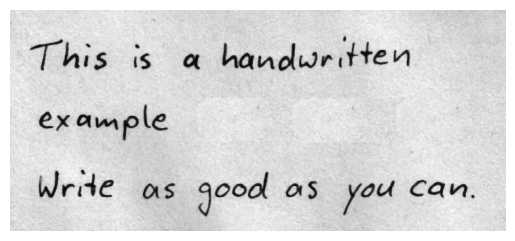

In [6]:
# Upload image to Colab
from google.colab import files
uploaded = files.upload()

# Read the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Thresholding or blurring
gray = cv2.medianBlur(gray, 3)

# Show image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


In [7]:
# Basic text extraction
text = pytesseract.image_to_string(gray)
print("Detected Text:\n", text)


Detected Text:
 This is a handwritten
example

Write as qooal as you can.



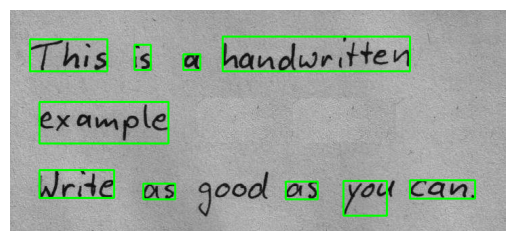

In [10]:
# Simple example using Tesseract bounding boxes
h, w, _ = image.shape
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

for i, word in enumerate(d['text']):
    if int(d['conf'][i]) > 60:  # confidence threshold
        (x, y, width, height) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
